# Pytest

Pytest is a Unit Test framework for python.


## Pytest presentation

" _pytest is a mature full-featured Python testing tool that helps you write better programs._ "  [according to documentation](https://docs.pytest.org/en/latest/)


Pytest philosophie is to provide a convenient way to write 

* from small unit tests
* to full functional tests

## Pytest is

## A library

To use *pytest*, install it in your project

```bash
# pip
pip install pytest
# conda
conda install -c anaconda pytest
```

## A command

_Pytest_ is mainly use as a **command**

```bash
$ pytest -v
```

but you can use it as a **module**

```bash
$ python -m pytest
```

## As a philosophy

*Pytest* is committed to make your tests easy to design and run.

* Very easy tests design
* Discovery by convention
* Easy lifecycle with fixtures

## Using pytest the usual way

- Creates a project _pytestwordir_  with a virtualenv inside 

`python -m venv pytestwordir/venv`

- Go inside and activate the virtualenv
    - Linux  &rarr; `. ./ven/bin/activate`
    - Windows &rarr; `\Scripts\activate`
- Install pytest 

`pip install pytest`

- Creates a package _'my'_ 

`mkdir my`




Creates a file called `my/Computer.py` and copy paste following

```python
class Computer:
    
    def __init__(self):
        self.total = 0
        
    def add(self,a):
        self.total = self.total + a
        return self.total
    
    def substract(self,a):
        self.total = self.total - a
        return self.total
    
    def reset(self):
        self.total = 0
```

Creates a unit test file `my/test_computer.py` and copy/past

```python
from my.Computer import Computer

def test_simple_addition():
    computer = Computer()
    computer.add(1)
    assert computer.total == 1

def test_simple_substraction():
    computer = Computer()
    computer.substract(1)
    assert computer.total == -1

def test_nope():
    computer = Computer()
    assert computer.total == 0
    ```

Run  the pytest command

```bash
$ pytest my/

================================== test session starts ======================
platform win32 -- Python 3.7.1, pytest-5.2.1, py-1.8.0, pluggy-0.13.0
rootdir: C:\temp\foo
collected 3 items

my\test_computer.py ...                                                [100%]

================================== 3 passed in 0.03s ========================
```

Add a new class to `my/Computer.py`

```python
class NumberWriter:

    mapping = {'0': 'zero', '1': 'one', '2': 'two', '3': 'three', '4': 'four', '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine'}

    def as_words(self,number):
        """Return a number decomposed as words separated by a -"""
        number_as_str = str(number)
        return '-'.join([NumberWriter.mapping[c] for c in number_as_str])
```

And new unit tests `my/test_writer.py`

```python
from my.Computer import NumberWriter

def test_writer_one():
    writer = NumberWriter()
    assert writer.as_words(1) == 'one'

def test_writer_several():
    writer = NumberWriter()
    assert writer.as_words(123) == 'one-two-three'    
```

Run pytest with the verbose option `-v`

```bash
pytest m -v
========================== test session starts ==========================
platform win32 -- Python 3.7.1, pytest-5.2.1, py-1.8.0, pluggy-0.13.0 -- c:\temp\foo\scripts\python.exe
cachedir: .pytest_cache
rootdir: C:\temp\foo
collected 5 items

my/test_computer.py::test_simple_addition PASSED                   [ 20%]
my/test_computer.py::test_simple_substraction PASSED               [ 40%]
my/test_computer.py::test_nope PASSED                              [ 60%]
my/test_writer.py::test_writer_one PASSED                          [ 80%]
my/test_writer.py::test_writer_several PASSED                      [100%]

=========================== 5 passed in 0.03s ===========================
```

As you can see, pytest 
* detect all tests, 
* run them for you 
* and display a report.

## Pytest discovery 

We describe here the default mechanism. Consult the [Official description](https://docs.pytest.org/en/latest/goodpractices.html#conventions-for-python-test-discovery) to get all variants

## Directory discovery

* No argument &rarr; Starts from the current directory (*where the command is ran*)
* Directory argument &rarr; Starts from the argument directory ( as `pytest my/` )
* Runs **recursevely** through directory from **starting point**

## File discovery

Search for 

* `test_*.py` 
* `*_test.py` 

and import them. 

## Tests discovery (outside of class)

Only `test` **prefixed** test functions

```python
def test_something(): # <- OK
    #...
def something_test(): # <- not detected
    #...
def something(): # <- not detected
    #...
```

## Tests discovery  (inside of class) 

Only `test` **prefixed** test functions or methods (the same)

Class must 
* have `Test` prefixed class name (`TestComputer`)
* have no `__init__` constructor

```Python
class TestSomething():
    def test_something():
        #...
```

## Using pytest in a notebook

We'll show some pytest into the notebook because it's more convenient.


To make it working into notebook, we have to make some _magic_. ***It's not the recommended way of doing, it's only for the course.***

<div class="alert alert-danger">
    
**DISCLAIMER**

A notebook is not a software. 

It's just a smart way of showing algorithmes, results, plots or courses. 

Please do not use notebook, also powerful they are, to code __software__.

If you need to be convinced, see [Why I hate notebooks](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit#slide=id.g362da58057_0_1)
</div>

As powerpoint is not a painting tool, Notebook is not a software creating tool.

<div class="alert alert-info">
    
The following instruction is to make pytest works in notebook with [ipytest library](https://pypi.org/project/ipytest/)
    
You don't have to do this in *normal* situation.
</div>

In [2]:
import pytest
import ipytest

ipytest.config(rewrite_asserts=True, magics=True)

__file__ = 'pytest-intro.ipynb' # <- use the notebook filename to make ipytest scan python cells.

/home/mdexet/Workdir/EUCLID/WorkshopPythonCpp/Python-pytest/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mdexet/Workdir/EUCLID/WorkshopPythonCpp/Python-pytest/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/mdexet/Workdir/EUCLID/WorkshopPythonCpp/Python-pytest/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mdexet/Workdir/EUCLID/WorkshopPythonCpp/Python-pytest/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your insta

To make pytest run on a notebook, **you have** to put this **magyc** notebook instruction ***at the beginning of the cell***.

```python
%%run_pytest[clean] -qq
# Magyc instruction - ONLY FOR RUNNING PYTEST IN NOTEBOOK
```

* `-qq` to pass test silently
* `-q` to have number of passed tests
* without argument &rarr; the usual output
* `-v` verbose mode
* `[clean]` to make _ipytest_ forget the former tests in previous cells  
and run only the current tests

## Demonstration with our computer

Let's include our class Computer

In [3]:
# %load my/Computer.py
class Computer:
    
    def __init__(self):
        self.total = 0
        
    def add(self,a):
        self.total = self.total + a
        return self.total
    
    def substract(self,a):
        self.total = self.total - a
        return self.total
    
    def reset(self):
        self.total = 0

In [4]:
%%run_pytest[clean] -v
# Magyc instruction - ONLY FOR RUNNING PYTEST IN NOTEBOOK

def test_addition():
    # setup
    computer = Computer()
    # given
    a = 1
    # when
    computer.add(a)
    # then
    assert computer.total == 1
    # teardown
    # nothing

=============================================================================================== test session starts ===============================================================================================
platform linux -- Python 3.6.8, pytest-5.2.2, py-1.8.0, pluggy-0.13.0 -- /home/mdexet/Workdir/EUCLID/WorkshopPythonCpp/Python-pytest/venv/bin/python3.6
cachedir: .pytest_cache
metadata: {'Python': '3.6.8', 'Platform': 'Linux-4.15.0-66-generic-x86_64-with-debian-buster-sid', 'Packages': {'pytest': '5.2.2', 'py': '1.8.0', 'pluggy': '0.13.0'}, 'Plugins': {'sugar': '0.9.2', 'cov': '2.8.1', 'mock': '1.11.2', 'html': '2.0.0', 'metadata': '1.8.0'}}
rootdir: /home/mdexet/Workdir/EUCLID/WorkshopPythonCpp/Python-pytest
plugins: sugar-0.9.2, cov-2.8.1, mock-1.11.2, html-2.0.0, metadata-1.8.0
collecting ... collected 1 item

pytest-intro.py::test_addition PASSED                                                                                                                                  

# Pytest 101

Creates your first tests.

## Create test

Now you know how to do... it's so simple.

```python
def test_something():
    #blabla
    assert something
```

## Assertions

Use the standard built-in assertion

```python
assert thing
assert thing is None
assert len(thing) > 100
assert thing == True
assert foo is not bar
...
```

## Customize the assertion message

You could use the message feature of standard `assert`

```python 
assert condition, message
```

In [5]:
%%run_pytest[clean] -qq

def test_something():
    # given
    actual = 'A'
    expected = 'B'
    
    assert actual == expected, f'You have messed, {actual} is not {expected}'


F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
_________________________________________________________________________________________________ test_something __________________________________________________________________________________________________

    def test_something():
        # given
        actual = 'A'
        expected = 'B'
    
>       assert actual == expected, f'You have messed, {actual} is not {expected}'
E       AssertionError: You have messed, A is not B
E       assert 'A' == 'B'
E         - A
E         + B

<ipython-input-5-ec3693ef7c6d>:6: AssertionError


There's some more customization available **per argument type** see [official documentation](http://doc.pytest.org/en/latest/assert.html#making-use-of-context-sensitive-comparisons)

## Reporting

By default, reports are written on terminal.

Levels of verbosity
```
  -v, --verbose         increase verbosity.
  -q, --quiet           decrease verbosity.
  --junit-xml=path      create junit-xml style report file at given path.  
```

But as you will see them all the time... 

### Pytest-sugar

A little plugin to make your test life fun (a little more fun)

<center><img src="https://camo.githubusercontent.com/013af37952e3ed198ef0bcae528789dc37559c4d/687474703a2f2f7069766f7466696e6c616e642e636f6d2f7079746573742d73756761722f696d672f766964656f2e676966"></center>

### pytest-html

To plugin to report as HTML

`pytest --html=report.htm`

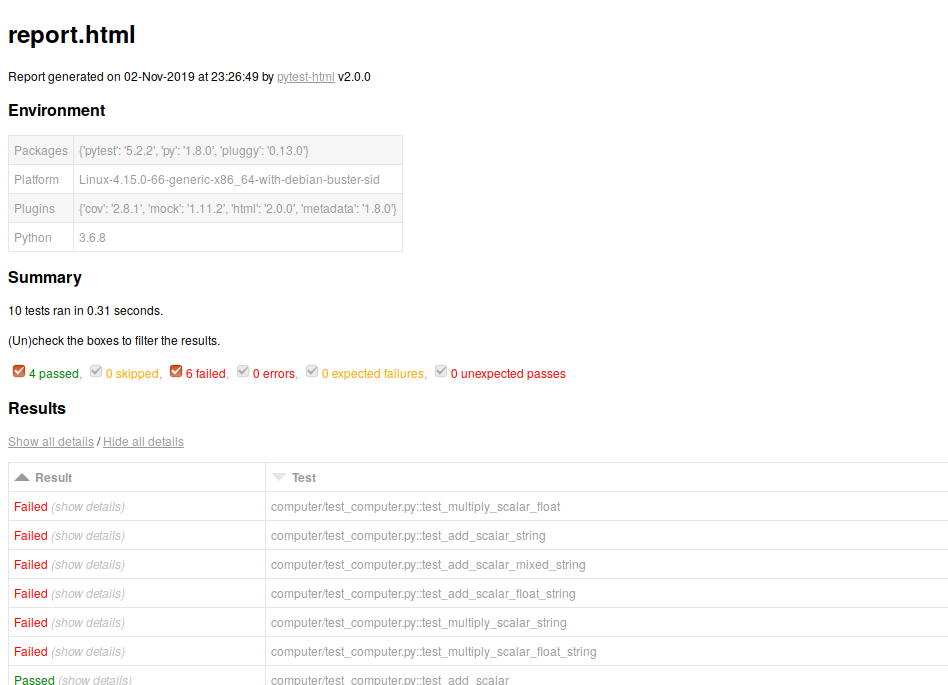

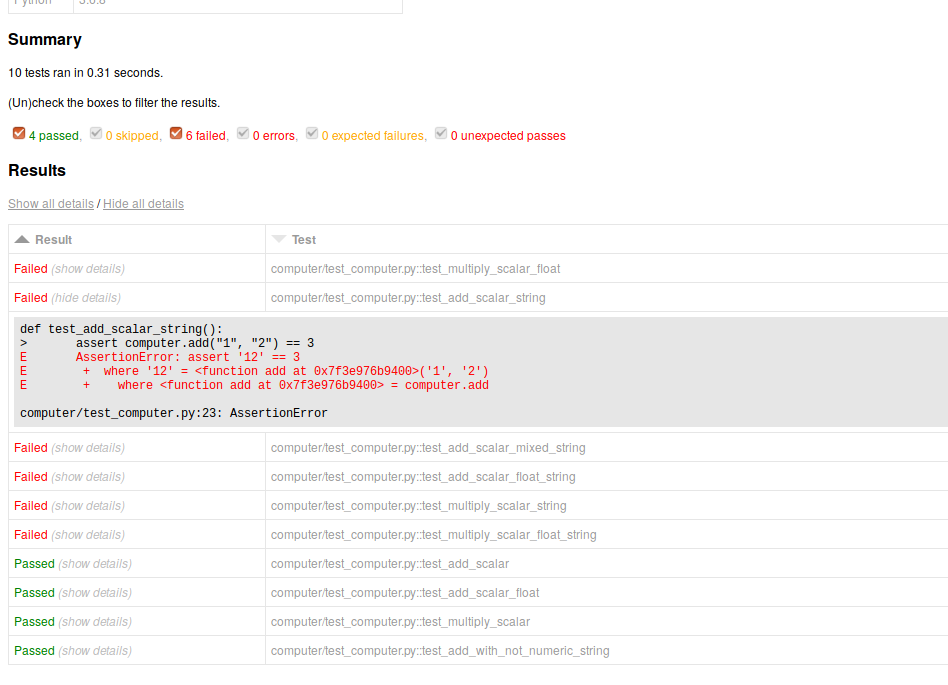

## Float comparison 

The good old problem...

In [6]:
assert 0.1 + 0.2 == 0.3, f'Difference is {(0.1 + 0.2 - 0.3)}'

AssertionError: Difference is 5.551115123125783e-17
assert (0.1 + 0.2) == 0.3

## Pytest.approx

Pytest offers a solution, [pytest.approx](https://docs.pytest.org/en/latest/reference.html#pytest-approx), to compare floats with a relative tolerance of 1e-6.

In [7]:
assert 0.1 + 0.2 == pytest.approx(0.3)

In [8]:
import numpy as np
from pytest import approx

# scalar

assert 0.1 + 0.2 == pytest.approx(0.3) # i.e. 0.3 ± 0.3*1e-6

# sequence
assert (0.1 + 0.2, 0.2 + 0.4) == approx((0.3, 0.6))

# dict
assert {'a': 0.1 + 0.2, 'b': 0.2 + 0.4} == approx({'a': 0.3, 'b': 0.6})

# numpy
assert np.array([0.1, 0.2]) + np.array([0.2, 0.4]) == approx(np.array([0.3, 0.6]))

Precision can be valued as **relative** or **absolute**

In [ ]:
pytest.approx(2.5, rel=0.01)

In [ ]:
pytest.approx(2.5, abs=0.01)

## Use numpy.testing

When working with numpy, use `numpy.testing`

In [13]:
%%run_pytest[clean] -qq
import numpy as np

def test_array_equals():
    assert np.array_equal(np.array((1,2)), np.array((1,2.1)))

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
________________________________________________________________________________________________ test_array_equals ________________________________________________________________________________________________

    def test_array_equals():
>       assert np.array_equal(np.array((1,2)), np.array((1,2.1)))
E       assert False
E        +  where False = <function array_equal at 0x7f1412961b70>(array([1, 2]), array([1. , 2.1]))
E        +    where <function array_equal at 0x7f1412961b70> = np.array_equal
E        +    and   array([1, 2]) = <built-in function array>((1, 2))

In [14]:
%%run_pytest[clean] -qq
import numpy as np

def test_array_equals():
    np.testing.assert_array_equal(np.array((1,2)), np.array((1,2.1)))

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
________________________________________________________________________________________________ test_array_equals ________________________________________________________________________________________________

    def test_array_equals():
>       np.testing.assert_array_equal(np.array((1,2)), np.array((1,2.1)))
E       AssertionError: 
E       Arrays are not equal
E       
E       Mismatch: 50%
E       Max absolute difference: 0.1
E       Max relative difference: 0.04761905
E        x: array([1, 2])
E        y: array([1. , 2.1])

<ipython-input-14-095801de14f5>:4: Ass

## Check an exception  is raised

_More difficult._

Image the _Processing Under Test_ must raise an exception

In [ ]:
def check_planet_name(name: str):
    if name not in 'Mercury Venus Earth Mars Jupiter Saturn Uranus Neptune'.split():
        raise ValueError(f'{name} is not a planet')
    

In [ ]:
%%run_pytest[clean] -qq

def test_is_a_planet():
    check_planet_name('Mercury')
    
def test_is_a_planet():
    check_planet_name('foo')

Pytest uses a context manager `pytest.raises` to check an exception is raised.

Simple one: just check if exception is raised

In [ ]:
%%run_pytest[clean] -qq

def test_is_a_planet():
    with pytest.raises(ValueError):
        check_planet_name('foo')

Detailled one: get the raised exception and inspect it.

In [ ]:
%%run_pytest[clean] -qq
        
def test_is_a_planet_with_exception_detail():
    with pytest.raises(ValueError) as exception :
        check_planet_name('foo')        
    assert str(exception.value) == 'foo is not a planet'


Matches the exception's message.

In [ ]:
%%run_pytest[clean] -qq

def test_is_a_planet_with_matcher():
    with pytest.raises(ValueError, match=r'foo is*' ):
        check_planet_name('foo')

For more information, please take a look at [pytest Raises Official Documentation](https://docs.pytest.org/en/latest/reference.html#pytest-raises)

## Playing with files and directories

When testing, you could need to use files or directories.

But as unit testing must **repeatable**, it must not depend on a specific location or computer.

You need <b><span style="font-size: larger">temporary directories and files</span></b>.

### Temporary files fixtures

You could do them *by hand* but *pytest* offers special functions to create temporary files and directory

* `tmp_path` [source](https://github.com/pytest-dev/pytest/blob/master/src/_pytest/tmpdir.py#L164)
* `tmp_path_factory`
* `tmpdir`
* `tmpdir_factory`

The main differences are about file abstraction and scope.

* File System abstraction
    * `tmp_path_*` &rarr; `pathlib/pathlib2.Path`
    * `tmpdir_*` &rarr; `py.path.local` &rarr; `os.path`
* Scope
    * **simple type** (`tmp_path` and `tmpdir`) &rarr; each test (scope = function)
    * **factories** &rarr; for the whole test session (scope = session)

In [ ]:
def count_words_with_characters(filename=None,*characters):
    count=0
    with open(filename,'r') as f:
        for line in f.readlines():
            for word in line.split():
                for character in characters:
                    if character in word:
                        count+= 1
    return count

In [ ]:
%%run_pytest[clean] -q

SPEECH="""I have a dream that my four little children 
will one day live in a nation where they will not be judged 
by the color of their skin but by the content of their character."""

def test_count_words_with_characters(tmp_path):
    # given
    d = tmp_path / "count_words_with_characters"
    d.mkdir()
    p = d / "test1.txt"
    p.write_text(SPEECH)
    
    assert count_words_with_characters(str(p),'a') == 8
    

But where do these special functions come from  ?

Let's discover the power of <a href="pytest-fixtures.ipynb">fixtures</a>